# Tensor Flow

In [125]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Input
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential

## Loading Data

In [109]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Plots

The shape of $X$ is $(60.000, 28, 28)$ that mean we have 60,000 of samples, where each sample is a matrix of 28x28. 

Each point represent a pixel, and since only have 2 colors, a value can be used to map this range the values from $0$ to $1$

A simple example with 5 x 5

\begin{bmatrix}
0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{bmatrix}

Whe plot, 0 means black and 1 white, so this matrix plot the number $1$

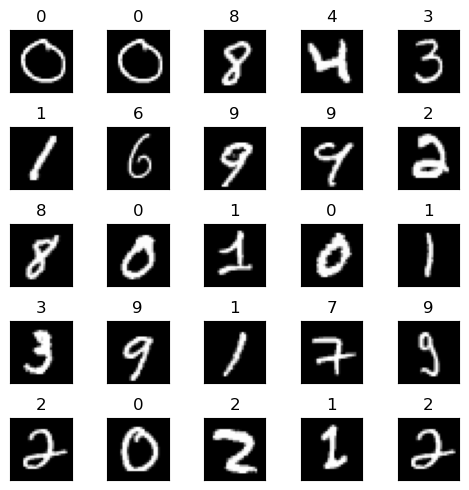

In [119]:
fig, axs = plt.subplots(5, 5, figsize = (5, 5))

for ax in axs.flatten():
    idx = round(np.random.rand()*100)
    ax.imshow(x_train[idx], cmap ='gray')
    ax.tick_params(
        left=False, bottom=False, 
        labelleft=False, labelbottom=False)
    ax.set_title(y_train[idx])

fig.tight_layout()

In [112]:
# Some transformation in order to model
shape_y = (-1, 1)

x_train_model, x_test_model = x_train.copy(), x_test.copy()
y_train_model, y_test_model = y_train.reshape(shape_y).copy(), y_test.reshape(shape_y).copy()

In [152]:
# Model
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])
# Add optimizer, loss and metrics
model.compile(
    optimizer='adam',
    loss = SparseCategoricalCrossentropy,
    metrics = ['accuracy']
)
# train
model.fit(x_train_model, y_train_model, epochs=5)

# Evaluate model
model.evaluate(x_test_model, y_test_model)

# Predicttions
predictions = model.predict(x_test_model)

print("Predict:{} vs Real:{}".format(np.argmax(predictions[0]), y_test_model[0]))

/opt/conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8618 - loss: 0.4733
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9549 - loss: 0.1519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9684 - loss: 0.1077
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9733 - loss: 0.0874
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9744 - loss: 0.0787
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0889
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predict:7 vs Real:[7]


In [153]:

# Model
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='linear')
])
# Add optimizer, loss and metrics
model.compile(
    optimizer='adam',
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
# train
model.fit(x_train_model, y_train_model, epochs=5)

# Evaluate model
model.evaluate(x_test_model, y_test_model)

# Predicttions
predictions = model.predict(x_test_model)

print("Predict:{} vs Real:{}".format(np.argmax(predictions[0]), y_test_model[0]))

/opt/conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8568 - loss: 0.4864
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9565 - loss: 0.1515
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9649 - loss: 0.1147
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.0856
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9773 - loss: 0.0732
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9721 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
Predict:7 vs Real:[7]


Multi label classifiication

In [57]:
x = np.array([
    [1, 0.5], 
    [0.5, 9]])
    
model = tf.keras.layers.Dense(units=2, activation='sigmoid')

In [58]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5.9744555e-01, 3.5341862e-01],
       [3.5209812e-02, 1.4919286e-04]], dtype=float32)>

In [59]:
for xx in model.trainable_variables:
    print(xx.name, xx.shape, xx.numpy())

kernel (2, 2) [[ 0.59529006 -0.11786866]
 [-0.40091455 -0.9723542 ]]
bias (2,) [0. 0.]


In [47]:
s =  [[-0.9878113, -0.9909279],
 [-0.21757996, 0.7717433 ]]

In [53]:
x@np.array(s)

array([[-1.09660128, -0.60505625]])

In [56]:
np.array(s)

array([[-0.9878113 , -0.9909279 ],
       [-0.21757996,  0.7717433 ]])

In [55]:
1/(1 + np.exp(-1*(- 1.0966128)))

0.250375091498104

In [10]:
model = tf.keras.models.Sequential([
    tk.keras.Input(shape=(2,))
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

Advice for applying machine learning:

Diagnostic:
- a test that you run to gain insight into what is/isn't working with a leaning algorithm, to gain guiadance into improving its performance. 

Establishing a base line lvel of performance

- Human level performance
- Competing algorithm performace
- Guess based on experience